In [4]:
from lib import models
from lib import model_eval
from lib import dataLoader
import torch
import os
import pandas as pd
import numpy as np
import statistics
from IPython.display import display
import matplotlib.pyplot as plt
import random

valid_path = "C:/Users/Ryan/.cache/BreaKHis_split/val"
magnifications = ["40X", "100X", "200X", "400X"]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model Analysis

Now that the models have been trained, it's time to perform some analysis on them.  
In the case of breast cancer, I decided that I wanted to minimize False Negatives over False Positives.  
This is because in a real case scenario a False Positive would likely be followed by other tests but a False Negative might not be, and could remain undetected.

The metric that I am mainly concerned with is recall. (ratio of correct positive predictions to actual positive cases), though achieving a high precision (ratio of correct positive predictions to all positive predictions) is also desirable. Ideally, the best way would be to look at the f1 score and the recall to select the best model. 

Since the number of models being validated and number of magnificaton validaiton datasets is small, the first thing to do is to look at the accuracy, precision, recall, and f1 scores for all of them. 

In [6]:
def display_valid_dfs(df):
    for k, v in df.items():
        print("Magnification: {}".format(k))
        v.index.name = "Model Number"
        display(v)

### Densenet Validation

In [7]:
model_struct = models.DenseNet_model()
weights_path = "trained_models/DenseNet_model"
DN_valid_results = model_eval.validate_model(model_struct, weights_path, valid_path, device, last = 5)
display_valid_dfs(DN_valid_results)

Magnification: 100X


,Accuracy,Precision,Recall,f1
Model Number,,,,
11,0.685714,0.685714,1.0,0.813559
16,0.685714,0.685714,1.0,0.813559
19,0.685714,0.685714,1.0,0.813559
23,0.695238,0.692308,1.0,0.818182
25,0.704762,0.699029,1.0,0.822857


Magnification: 200X


,Accuracy,Precision,Recall,f1
Model Number,,,,
11,0.721154,0.720000,0.986301,0.832370
16,0.701923,0.701923,1.000000,0.824859
19,0.711538,0.708738,1.000000,0.829545
23,0.711538,0.712871,0.986301,0.827586
25,0.721154,0.724490,0.972603,0.830409


Magnification: 400X


,Accuracy,Precision,Recall,f1
Model Number,,,,
11,0.690722,0.687500,1.0,0.814815
16,0.680412,0.680412,1.0,0.809816
19,0.680412,0.680412,1.0,0.809816
23,0.680412,0.680412,1.0,0.809816
25,0.721649,0.709677,1.0,0.830189


Magnification: 40X


,Accuracy,Precision,Recall,f1
Model Number,,,,
11,0.699029,0.693069,1.0,0.818713
16,0.679612,0.679612,1.0,0.809249
19,0.679612,0.679612,1.0,0.809249
23,0.679612,0.679612,1.0,0.809249
25,0.699029,0.693069,1.0,0.818713


### MobileNet Validation

In [8]:
model_struct = models.MobileNet_model()
weights_path = "trained_models/MobileNet_model"
MN_valid_results = model_eval.validate_model(model_struct, weights_path, valid_path, device)
display_valid_dfs(MN_valid_results)

Magnification: 100X


,Accuracy,Precision,Recall,f1
Model Number,,,,
7,0.685714,0.685714,1.0,0.813559
8,0.685714,0.685714,1.0,0.813559
9,0.685714,0.685714,1.0,0.813559
11,0.685714,0.685714,1.0,0.813559
13,0.685714,0.685714,1.0,0.813559


Magnification: 200X


,Accuracy,Precision,Recall,f1
Model Number,,,,
7,0.701923,0.701923,1.0,0.824859
8,0.701923,0.701923,1.0,0.824859
9,0.701923,0.701923,1.0,0.824859
11,0.701923,0.701923,1.0,0.824859
13,0.701923,0.701923,1.0,0.824859


Magnification: 400X


,Accuracy,Precision,Recall,f1
Model Number,,,,
7,0.680412,0.680412,1.0,0.809816
8,0.680412,0.680412,1.0,0.809816
9,0.680412,0.680412,1.0,0.809816
11,0.680412,0.680412,1.0,0.809816
13,0.680412,0.680412,1.0,0.809816


Magnification: 40X


,Accuracy,Precision,Recall,f1
Model Number,,,,
7,0.679612,0.679612,1.0,0.809249
8,0.679612,0.679612,1.0,0.809249
9,0.679612,0.679612,1.0,0.809249
11,0.679612,0.679612,1.0,0.809249
13,0.679612,0.679612,1.0,0.809249


### ResNet Validation

In [9]:
model_struct = models.ResNet_model()
weights_path = "trained_models/ResNet_model"
RN_valid_results = model_eval.validate_model(model_struct, weights_path, valid_path, device)
display_valid_dfs(RN_valid_results)

Magnification: 100X


,Accuracy,Precision,Recall,f1
Model Number,,,,
11,0.685714,0.685714,1.0,0.813559
12,0.685714,0.685714,1.0,0.813559
13,0.685714,0.685714,1.0,0.813559
14,0.685714,0.685714,1.0,0.813559
23,0.685714,0.685714,1.0,0.813559


Magnification: 200X


,Accuracy,Precision,Recall,f1
Model Number,,,,
11,0.701923,0.701923,1.0,0.824859
12,0.701923,0.701923,1.0,0.824859
13,0.701923,0.701923,1.0,0.824859
14,0.701923,0.701923,1.0,0.824859
23,0.701923,0.701923,1.0,0.824859


Magnification: 400X


,Accuracy,Precision,Recall,f1
Model Number,,,,
11,0.680412,0.680412,1.0,0.809816
12,0.680412,0.680412,1.0,0.809816
13,0.680412,0.680412,1.0,0.809816
14,0.680412,0.680412,1.0,0.809816
23,0.680412,0.680412,1.0,0.809816


Magnification: 40X


,Accuracy,Precision,Recall,f1
Model Number,,,,
11,0.679612,0.679612,1.0,0.809249
12,0.679612,0.679612,1.0,0.809249
13,0.679612,0.679612,1.0,0.809249
14,0.679612,0.679612,1.0,0.809249
23,0.679612,0.679612,1.0,0.809249


### VGG Validation

In [10]:
model_struct = models.VGG_model()
weights_path = "trained_models/VGG_model"
VGG_valid_results = model_eval.validate_model(model_struct, weights_path, valid_path, device)
display_valid_dfs(VGG_valid_results)

Magnification: 100X


,Accuracy,Precision,Recall,f1
Model Number,,,,
15,0.847619,0.888889,0.888889,0.888889
17,0.828571,0.821429,0.958333,0.884615
18,0.847619,0.878378,0.902778,0.890411
19,0.761905,0.747368,0.986111,0.850299
23,0.847619,0.868421,0.916667,0.891892


Magnification: 200X


,Accuracy,Precision,Recall,f1
Model Number,,,,
15,0.826923,0.857143,0.904110,0.880000
17,0.788462,0.793103,0.945205,0.862500
18,0.817308,0.846154,0.904110,0.874172
19,0.769231,0.769231,0.958904,0.853659
23,0.846154,0.851852,0.945205,0.896104


Magnification: 400X


,Accuracy,Precision,Recall,f1
Model Number,,,,
15,0.824742,0.876923,0.863636,0.870229
17,0.835052,0.828947,0.954545,0.887324
18,0.835052,0.878788,0.878788,0.878788
19,0.824742,0.802469,0.984848,0.884354
23,0.855670,0.833333,0.984848,0.902778


Magnification: 40X


,Accuracy,Precision,Recall,f1
Model Number,,,,
15,0.825243,0.833333,0.928571,0.878378
17,0.766990,0.755556,0.971429,0.850000
18,0.844660,0.864865,0.914286,0.888889
19,0.747573,0.734043,0.985714,0.841463
23,0.854369,0.848101,0.957143,0.899329


The results are quite shocking - in particular the DenseNet, ResNet, and MobileNet models are acheiving extremely high recall values seemingly in exchange for low precision. The validation also don't seem to change much with subsequent models, which suggest that 25 epochs was too much for this project, and that models using the DenseNet, ResNet, and MobileNet bases are overtrained. This is supported by the model numbers that have been saved. Notably, there are no weights saved for these models after epoch 15. In the future, it would be better to monitor validation scores per epoch during the training loop. Early training stops if scores do not improve significantly over several epochs should also be implemented as to avoid wasting resources.  

It is difficult to justify using these three models in a clinical setting however, as although their high recall indicates that most cases of malignant breast tumors would be detected, the accompanying low accuracy and precision indicates a lot of benign tumors would be misclassified. As current cancer treaments such as chemotherapy are harsh on the body, a model with too many false positives should not be considered.  

In comparison, it looks as if 25 epochs resulting in a good training for the VGG based model, resulting in extremely high recall, and moderately high precision and accuracy values. This model is more viable in a clinical setting as it will catch most cases of malignant tumors, and correctly diagnose most benign tumors.  

It's still a bit hard to see how well each model performs in general for all magnifications (well, for the VGG one anyways), so we should take the overal mean of both recall and f1 for each model. 


In [11]:
#find best model by getting model with best f1 score and best Median Aboslute Deviation.
def get_best_model(valid_results):
    best_scores = pd.DataFrame(columns = ["recall_mean", "recall_MAD", "f1_mean", "f1_MAD"])
    model_nums = next(iter(valid_results.values())).index

    for m in model_nums:
        recalls = [df.loc[m, "Recall"] for df in valid_results.values()]
        recall_mean = statistics.mean(recalls)
        recall_diff_from_mean = [abs(x - recall_mean) for x in recalls]
        recall_MAD = statistics.median(recall_diff_from_mean)
        
        f1s = [df.loc[m, "f1"] for df in valid_results.values()]
        f1_mean = statistics.mean(f1s)
        f1_diff_from_mean = [abs(x - f1_mean) for x in f1s]
        f1_MAD = statistics.median(f1_diff_from_mean)
        
        best_scores.loc[m] = [recall_mean, recall_MAD, f1_mean, f1_MAD]

    return best_scores

In [12]:
display(get_best_model(DN_valid_results).style.set_caption("DenseNet Validation"))

,recall_mean,recall_MAD,f1_mean,f1_MAD
11,0.996575,0.003425,0.819864,0.005677
16,1.000000,0.000000,0.814371,0.004838
19,1.000000,0.000000,0.815542,0.006010
23,0.996575,0.003425,0.816208,0.006676
25,0.993151,0.006849,0.825542,0.004757


In [13]:
display(get_best_model(MN_valid_results).style.set_caption("MobileNet Validation"))

,recall_mean,recall_MAD,f1_mean,f1_MAD
7,1.000000,0.000000,0.814371,0.004838
8,1.000000,0.000000,0.814371,0.004838
9,1.000000,0.000000,0.814371,0.004838
11,1.000000,0.000000,0.814371,0.004838
13,1.000000,0.000000,0.814371,0.004838


In [14]:
display(get_best_model(RN_valid_results).style.set_caption("ResNet Validation"))

,recall_mean,recall_MAD,f1_mean,f1_MAD
11,1.000000,0.000000,0.814371,0.004838
12,1.000000,0.000000,0.814371,0.004838
13,1.000000,0.000000,0.814371,0.004838
14,1.000000,0.000000,0.814371,0.004838
23,1.000000,0.000000,0.814371,0.004838


In [15]:
display(get_best_model(VGG_valid_results).style.set_caption("VGG Validation"))

,recall_mean,recall_MAD,f1_mean,f1_MAD
15,0.896302,0.020039,0.879374,0.005070
17,0.957378,0.007503,0.871110,0.014860
18,0.899990,0.009207,0.883065,0.006585
19,0.978894,0.007018,0.857444,0.011562
23,0.950966,0.020030,0.897526,0.003528


### Based on these results, it looks like the VGG model 19 is the best model produced.

As a final check, we view the accuracy for the model on all magnifications.

In [19]:
best_models_acc = pd.DataFrame(columns = ["100X", "200X", "400X", "40X"])
best_models_acc.loc["accuracy"] = [df.loc["19", "Accuracy"] for df in VGG_valid_results.values()]
best_models_acc.loc["precision"] = [df.loc["19", "Precision"] for df in VGG_valid_results.values()]
best_models_acc.loc["recall"] = [df.loc["19", "Recall"] for df in VGG_valid_results.values()]
best_models_acc = best_models_acc.reindex(columns=["40X","100X", "200X", "400X"])

In [20]:
best_models_acc

,40X,100X,200X,400X
accuracy,0.747573,0.761905,0.769231,0.824742
precision,0.734043,0.747368,0.769231,0.802469
recall,0.985714,0.986111,0.958904,0.984848


# Plotting some Examples

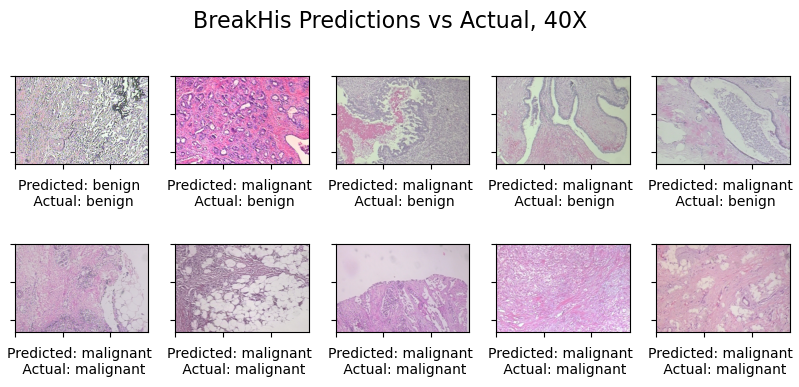

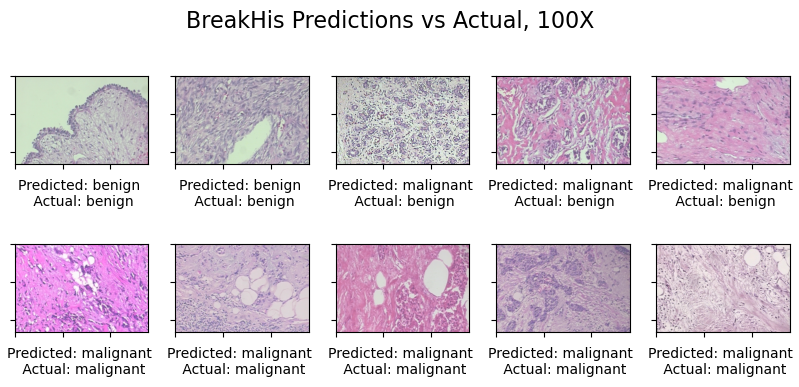

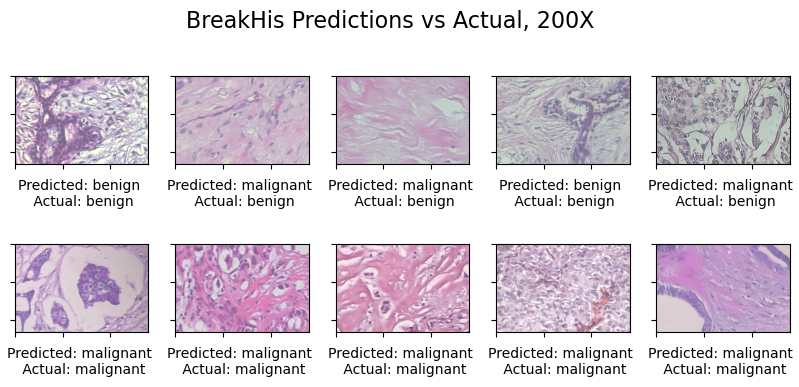

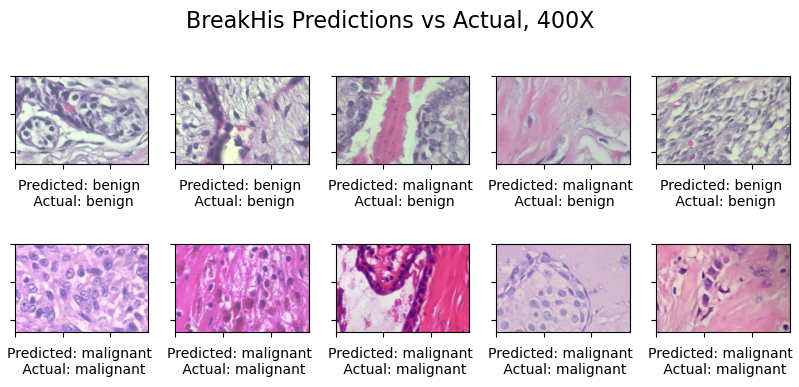

In [31]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

final_weight_path = "trained_models/VGG_model/model_20250119_144839_19"
final_model = models.VGG_model()
final_model.custom_classifier.load_state_dict(torch.load(final_weight_path, weights_only=True))
final_model.to(device)
final_model.eval()

t = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

for mag in magnifications:
    fig, axes = plt.subplots(2, 5, figsize = (10, 4)) #make 2 x 5 subplots
    axes = axes.flatten()
    
    #get 5 random images per label folder
    random_images = []
    labels = ["benign"] * 5 + ["malignant"] * 5
    
    file_path = os.path.join(valid_path, mag, "0")
    image_list = os.listdir(file_path)
    random_images.extend(os.path.join(file_path, f) for f in random.sample(image_list, 5))

    file_path = os.path.join(valid_path, mag, "1")
    image_list = os.listdir(file_path)
    random_images.extend(os.path.join(file_path, f) for f in random.sample(image_list, 5))

    processed_images = []
    for image_path in random_images:
        raw_image = Image.open(image_path).convert('RGB')
        processed_images.append(t(raw_image))

    processed_images = torch.stack(processed_images)
    processed_images = processed_images.to(device)
    with torch.no_grad():
        predictions = final_model(processed_images)
        predictions = torch.argmax(predictions, dim=1)
        predictions = ["malignant" if p == 1 else "benign" for p in predictions]

    for i, image in enumerate(random_images):
        img = mpimg.imread(image)
        ax = axes[i] 
        ax.imshow(img)
        ax.set_xlabel(f'Predicted: {predictions[i]} \n Actual: {labels[i]}')
        ax.set_yticklabels([])
        ax.set_xticklabels([])

    fig.suptitle(f'BreakHis Predictions vs Actual, {mag}', fontsize=16)
    plt.show()
        

# Conclusion

Overall, my findings were not consistent with the original paper that they were based on. The DenseNet model did not achieve the best results, and it seems that the VGG model has more potential for clinical application. It should be noted that accuracy, precision, and recall remained consistent betweeen all magnifications, indicating that achieving the exact same accuracy for all magnifiations, as is observed in the original paper, is possible.  

However, the conclusions of this study cannot truly be used to verify the original paper. A smaller dataset was used during training due to hardware constraints, and the author's inexperience makes this work suspect to errors. 

Future endevours should implement methods of validating results during the training loop, and writing early stop mechanisms to prevent unecessary training. Additionally, multiple different models could be trained by identifying model weights with potential, and creating several different branch models from said weights.
